#  Validation of various propagation methods 

Validation tests for the implemented algorithms in propagate module: 
* Rayleigh-Sommerfeld Integral 
* Fraunhofer approximation 
* Fresnel approximation 

Throughout we use Goodman Introduction to Fourier Optics book as reference and for validation examples 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

In [2]:
import propopt 

import numpy as np 
import matplotlib.pyplot as plt 

from scipy import interpolate
from scipy.special import sinc 

from propopt import propagate as prop
#This is a module coming from pymoe, in the end they will be very similar so... 
from propopt import generate as gen 

# Validation of Rayleigh-Sommerfeld (RS) Integral

We consider a rectangular aperture and aim to compare the numerical result of the RS integral with the analytical solution

Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: 1.5>0.001321290322580645
The Fresnel number is smaller or equal to 1 (NF= 0.001761720430107527 ): The Fresnel approx may not be appropriate.


<IPython.core.display.Javascript object>


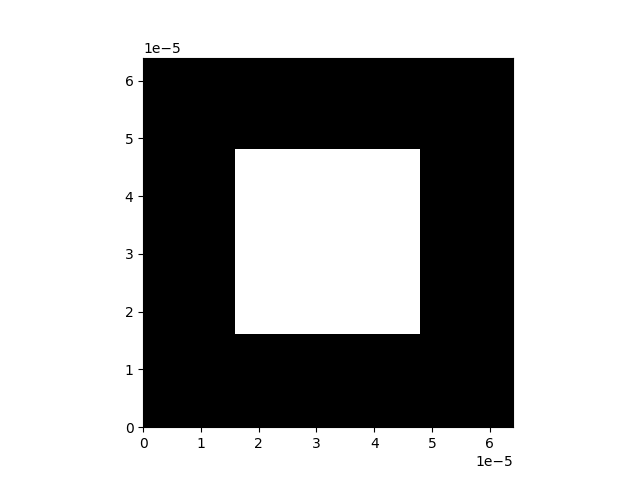

The number of screen is not large enough, I will resize them for you.
Rescaled the screen pixels to 256 . The computation will now proceed


<IPython.core.display.Javascript object>


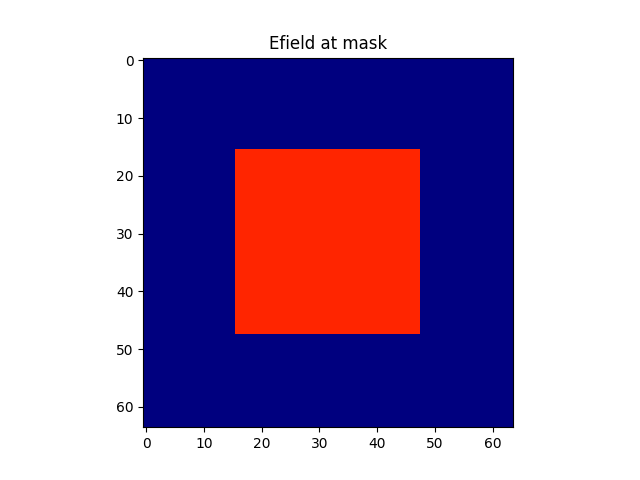

1.0567659360040308e-12
1.2867963509103794e-11
0.0
0.00390625
0.0078125
0.01171875
0.015625
0.01953125
0.0234375
0.02734375
0.03125
0.03515625
0.0390625
0.04296875
0.046875
0.05078125
0.0546875
0.05859375
0.0625
0.06640625
0.0703125
0.07421875
0.078125
0.08203125
0.0859375
0.08984375
0.09375
0.09765625
0.1015625
0.10546875
0.109375
0.11328125
0.1171875
0.12109375
0.125
0.12890625
0.1328125
0.13671875
0.140625
0.14453125
0.1484375
0.15234375
0.15625
0.16015625
0.1640625
0.16796875
0.171875
0.17578125
0.1796875
0.18359375
0.1875
0.19140625
0.1953125
0.19921875
0.203125
0.20703125
0.2109375
0.21484375
0.21875
0.22265625
0.2265625
0.23046875
0.234375
0.23828125
0.2421875
0.24609375
0.25
0.25390625
0.2578125
0.26171875
0.265625
0.26953125
0.2734375
0.27734375
0.28125
0.28515625
0.2890625
0.29296875
0.296875
0.30078125
0.3046875
0.30859375
0.3125
0.31640625
0.3203125
0.32421875
0.328125
0.33203125
0.3359375
0.33984375
0.34375
0.34765625
0.3515625
0.35546875
0.359375
0.36328125
0.3671875
0.371

<IPython.core.display.Javascript object>


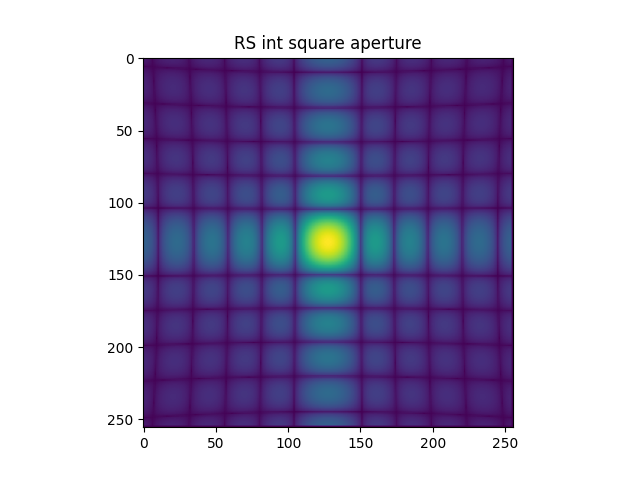

Text(0.5, 1.0, 'RS int square aperture')

In [3]:
###We start by using a square aperture  and compare the Rayleigh-Sommerfeld integral 
##Validate with rectangular aperture 

#number of pixels 
npix = 64
pixsize = 1e-6 #m
lda = 1550e-9 #m
zdist = 1500e-3 #m

#screen size 
xminus = -400e-3 #m
xplus = 400e-3 #m 

#size of the rectangular mask 
xsiz = npix*pixsize
ysiz = npix*pixsize

#partial size 
part = 0.5 

#half-size of the aperture 
rd = 0.5 * xsiz

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(2*rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")

          
###Generate square aperture 
rmask = propopt.gen.rect_mask(npix, xsiz, ysiz, partial =part, filename = None, plotting=True)
rmask = 1 - rmask

##Propagate field using RS integral 
RS_results = propopt.prop.RS_int(zdist, rmask, npix, pixsize, npix, xplus, xplus, lda, 1e-3, verbose = True)
itensity = RS_results[2] ##Get the intensity 

##Plotting 
fig=plt.figure()
plt.imshow(itensity)
plt.title("RS int square aperture")


<IPython.core.display.Javascript object>


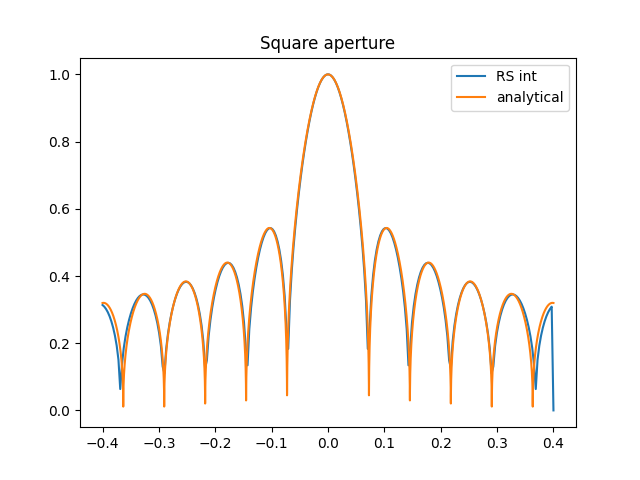

Text(0.5, 1.0, 'Square aperture')

In [4]:
###Here we plot the results 
#with  cut in the previous 2D map 
fig=plt.figure()
sizex,sizey = np.shape(itensity)

xar = np.arange(0,sizex)
midp = int(np.round(sizey/2))
yar = itensity[midp, :]

#Plot the profile cut line  normalized to maximum 
xarray = np.linspace(xminus, xplus, len(yar))
plt.plot(xarray,yar/np.max(yar), label="RS int")
pixsize = 1e-6

xarray2 = np.linspace(xminus, xplus, 10000)
#yarray = np.linspace(0,npix*pixsize, 18000)

xcoord = xarray2 
ycoord = xarray2*0

#lengths in x and y for the aperture 
wx = pixsize*npix*part
wy = pixsize*npix*part

####Calculate the analytical solution for the rectangular aperture
intensity2 = propopt.prop.rect_fraun(wx, wy, xcoord, ycoord, zdist, lda)
iplot = 10*intensity2**0.2

plt.plot(xarray2, iplot/np.max(iplot), label="analytical")
plt.legend()
plt.title("Square aperture")



3.2e-05
Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: 1.5>0.001321290322580645
The Fresnel number is smaller or equal to 1 (NF= 0.001761720430107527 ): The Fresnel approx may not be appropriate.


<IPython.core.display.Javascript object>


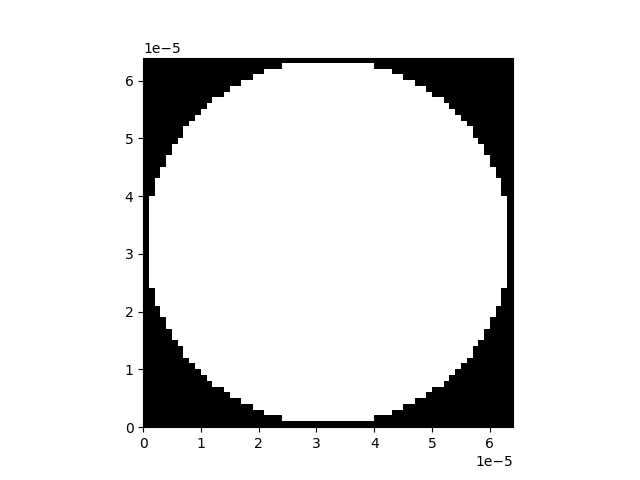

The number of screen is not large enough, I will resize them for you.
Rescaled the screen pixels to 256 . The computation will now proceed


<IPython.core.display.Javascript object>


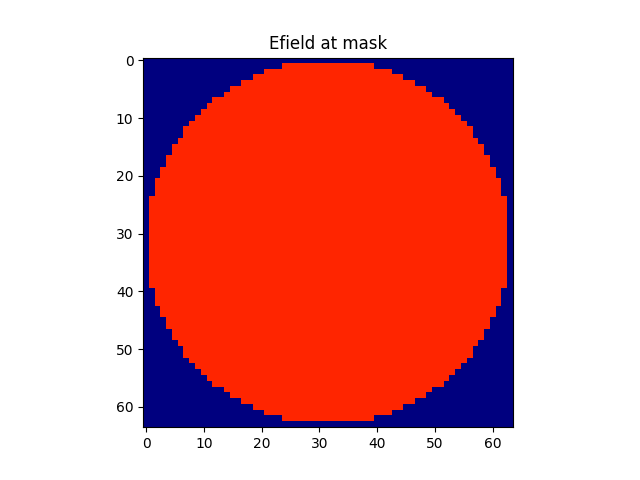

3.1950657596371865e-12
1.2867963509103794e-11
0.0
0.00390625
0.0078125
0.01171875
0.015625
0.01953125
0.0234375
0.02734375
0.03125
0.03515625
0.0390625
0.04296875
0.046875
0.05078125
0.0546875
0.05859375
0.0625
0.06640625
0.0703125
0.07421875
0.078125
0.08203125
0.0859375
0.08984375
0.09375
0.09765625
0.1015625
0.10546875
0.109375
0.11328125
0.1171875
0.12109375
0.125
0.12890625
0.1328125
0.13671875
0.140625
0.14453125
0.1484375
0.15234375
0.15625
0.16015625
0.1640625
0.16796875
0.171875
0.17578125
0.1796875
0.18359375
0.1875
0.19140625
0.1953125
0.19921875
0.203125
0.20703125
0.2109375
0.21484375
0.21875
0.22265625
0.2265625
0.23046875
0.234375
0.23828125
0.2421875
0.24609375
0.25
0.25390625
0.2578125
0.26171875
0.265625
0.26953125
0.2734375
0.27734375
0.28125
0.28515625
0.2890625
0.29296875
0.296875
0.30078125
0.3046875
0.30859375
0.3125
0.31640625
0.3203125
0.32421875
0.328125
0.33203125
0.3359375
0.33984375
0.34375
0.34765625
0.3515625
0.35546875
0.359375
0.36328125
0.3671875
0.371

In [5]:
###Validate with rectangular aperture 

#number of pixels 
npix = 64
pixsize = 1e-6 #m
lda = 1550e-9 #m
zdist = 1500e-3 #m

#screen size 
xminus = -400e-3 #m
xplus = 400e-3 #m 

xsiz = npix*pixsize
ysiz = npix*pixsize
 
part = 0.5
print(0.5*npix*pixsize)

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(2*rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")


circ = propopt.gen.circ_mask(npix, xsiz, ysiz, partial =part, filename = None ,plotting=True )
cmask = 1 - circ

#RS_int(zs, mask, npixmask, pixsizemask, npixscreen, dxscreen, dyscreen, wavelength, I0, verbose =False ): 
reslts = propopt.prop.RS_int(zdist, cmask, npix, pixsize, npix, xplus, xplus, lda, 1e-3, verbose = True)
itensity = reslts[2]



<IPython.core.display.Javascript object>


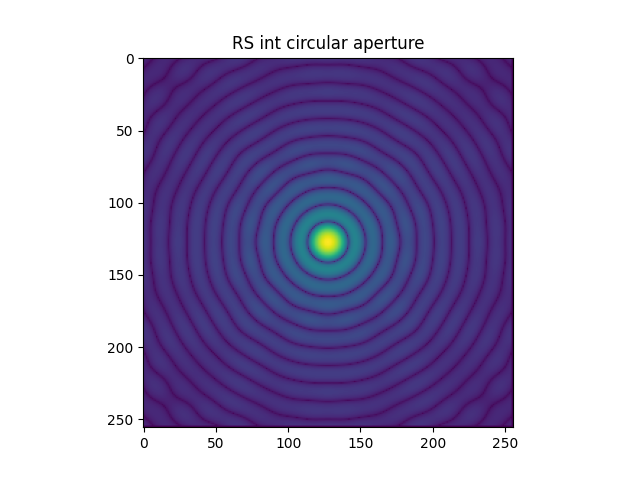

Text(0.5, 1.0, 'RS int circular aperture')

In [6]:
fig=plt.figure()
plt.imshow(itensity)
plt.title("RS int circular aperture")

<IPython.core.display.Javascript object>


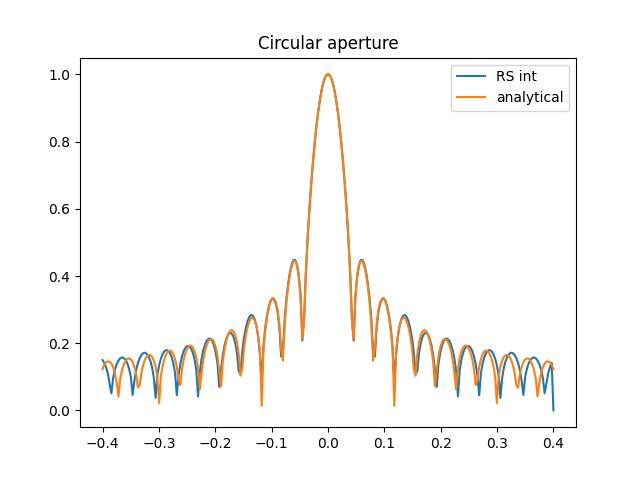

128


In [7]:
fig=plt.figure()
sizex,sizey = np.shape(itensity)

xar = np.arange(0,sizex)
midp = int(np.round(sizey/2))
print(midp)
yar = itensity[midp, :]

xarray = np.linspace(xminus, xplus, len(yar))
plt.plot(xarray,yar/np.max(yar), label ="RS int")

plt.title("Circular aperture")

xcoord = xarray 
ycoord = xarray

aperture_rad = part*xsiz

#Calculate the 
intensity2 = propopt.prop.circ_fraun(aperture_rad, xcoord, zdist, lda)
iplot = 10*intensity2**0.2
plt.plot(xarray, iplot/np.max(iplot), label="analytical")
plt.legend()


# Validation of Fraunhofer approximation propagation

We consider a rectangular aperture and aim to compare the numerical result of the Fraunhofer approximation with the analytical solution

Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: 1.8>0.16
The Fresnel number is smaller or equal to 1 (NF= 0.17777777777777778 ): The Fresnel approx may not be appropriate.
1.46484375e-05
0.02666666666666667


<IPython.core.display.Javascript object>


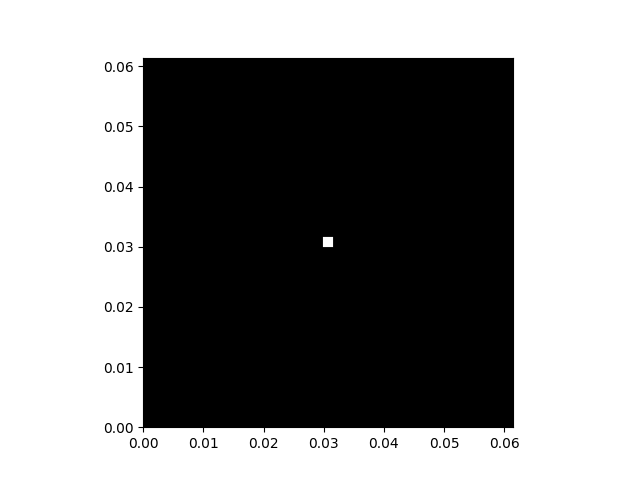

In [8]:
#Validation for Rectangular mask 

#here we use a big number of pixels  to have a good fraun approx, otherwise results might be innacurate
npix = 512
lda = 500e-9
pixsize = 120e-6
rd = 200e-6
zdist =1.8

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(2*rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")

##calculate the resolution of the mask
res = lda*zdist/ (pixsize*npix)
print(res)

part = rd/(npix*res)
print(part)

xsiz = npix*pixsize
ysiz = npix*pixsize 

###attention, it is still not very well centered, 
rmask = propopt.gen.rect_mask(npix, xsiz, ysiz, partial =part, filename=None, plotting=True)
rmask = 1 - rmask


1.46484375e-05


<IPython.core.display.Javascript object>


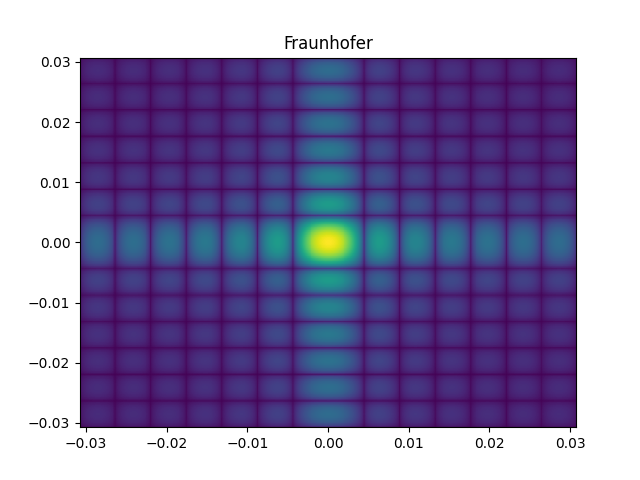

<IPython.core.display.Javascript object>


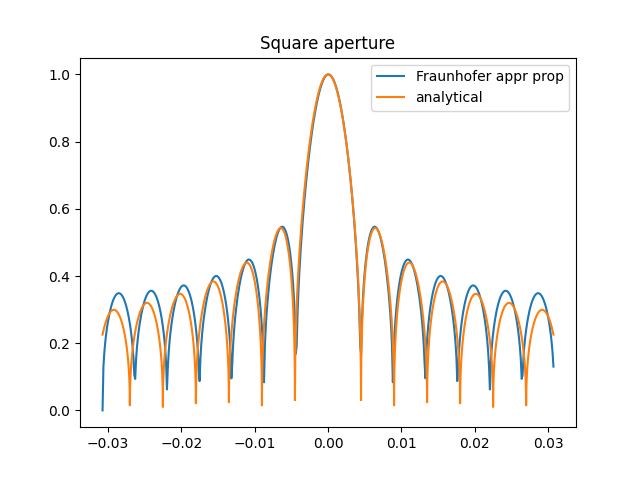

In [9]:
##calculate the resolution
res = lda*zdist/ (pixsize*npix)
print(res)

xminus = -npix*pixsize/2
xplus = npix*pixsize/2

##Calculate the propagation using Fraunhofer approx  
itensity3 = propopt.prop.fraunhofer(zdist, rmask, npix, res, npix, xplus, xplus, lda)**2

fig=plt.figure()
xs1 = np.linspace(-xplus, xplus, npix)
ys1 = np.linspace(-xplus, xplus, npix)
(xs3, ys3) = np.meshgrid(xs1, ys1)
plt.pcolormesh(xs3,ys3,10*itensity3**0.2)
plt.title("Fraunhofer")

###########################################################

#plots intensities of the two methods 
fig=plt.figure()
sizex,sizey = np.shape(itensity3)
xar = np.arange(0,sizex)
midp = int(np.round(sizey/2))
yar = 10*itensity3[midp, :]**0.2
xarray = np.linspace(xminus, xplus, len(yar))
plt.plot(xarray,yar/np.max(yar), label='Fraunhofer appr prop')
plt.title("Square aperture")

xarray = np.linspace(xminus, xplus, 18000)
sizex = res*npix*part
sizey = res*npix*part
xcoord = xarray
ycoord = xarray*0

###calculate the analytical result 
intensity2 = propopt.prop.rect_fraun(sizex, sizey, xcoord, ycoord, zdist, lda)
iplot = 10*intensity2**0.2
plt.plot(xarray, iplot/np.max(iplot), label="analytical")
plt.legend()

Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: 1.8>0.16
The Fresnel number is smaller or equal to 1 (NF= 0.17777777777777778 ): The Fresnel approx may not be appropriate.
1.46484375e-05
0.02666666666666667


<IPython.core.display.Javascript object>


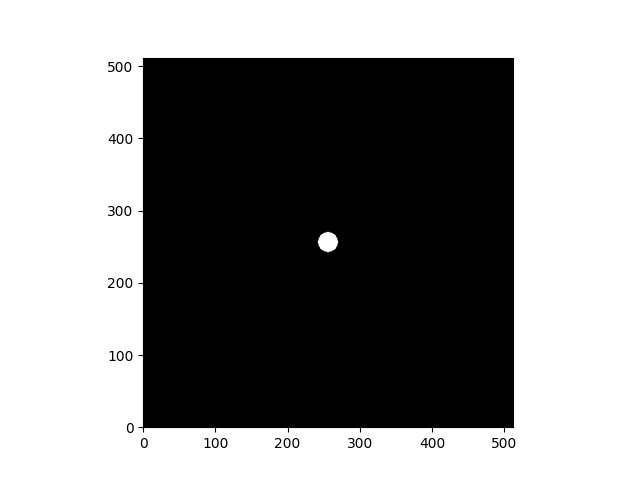

<IPython.core.display.Javascript object>


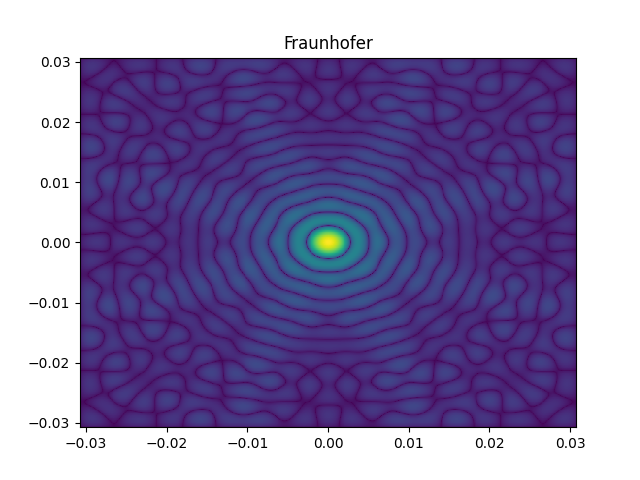

<IPython.core.display.Javascript object>


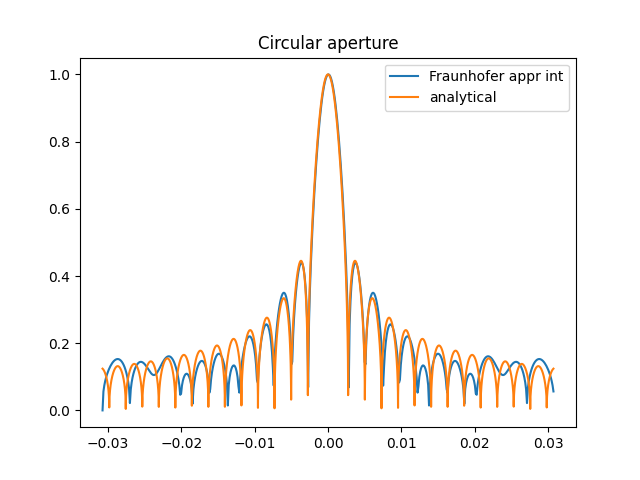

256


In [10]:
###Validation for circular aperture
npix = 512
lda = 500e-9
pixsize = 120e-6
rd = 200e-6
zdist =1.8

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(2*rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")


##calculate the resolution  
res = lda*zdist/ (pixsize*npix)
print(res)
xsiz = npix
ysiz = npix
part = rd/(npix*res)
print(part)

#generate the circular aperture mask 
circ = propopt.gen.circ_mask(npix, xsiz, ysiz, partial =part, filename = None, plotting = True)
cmask = 1 - circ

xminus = -npix*pixsize/2
xplus = npix*pixsize/2

###Calculate the propagation through fraunhofer approximation 
itensity3 = propopt.prop.fraunhofer(zdist, cmask, npix, pixsize, npix, xplus, xplus, lda)**2

###Plot the 2D diff pattern 
fig=plt.figure()
xs1 = np.linspace(-xplus, xplus, npix)
ys1 = np.linspace(-xplus, xplus, npix)
(xs, ys) = np.meshgrid(xs1, ys1)
plt.pcolormesh(xs,ys,10*itensity3**0.2)
plt.title("Fraunhofer")


#make cut at the 2D plot 
fig=plt.figure()
sizex,sizey = np.shape(itensity3)
xar = np.arange(0,sizex)
midp = int(np.round(sizey/2))
print(midp)
yar = 10*itensity3[midp, :]**0.2
xarray = np.linspace(xminus, xplus, len(yar))
plt.plot(xarray,yar/np.max(yar), label='Fraunhofer appr int')

plt.title("Circular aperture")

xarray = np.linspace(xminus, xplus, 18000)
xcoord = xarray 
ycoord = xarray

aperture_rad = rd

#Calculate the analytical result
intensity2 = propopt.prop.circ_fraun(aperture_rad, xcoord, zdist, lda)

iplot = 10*intensity2**0.2
plt.plot(xarray, iplot/np.max(iplot), label ="analytical")
plt.legend()

# Validation of Fresnel  approximation  propagation

1.055e-05
Fraunhoufer criterion failed because zdist < zfraun = 0.1<0.8000000000000002
The Fresnel number is larger than 1 (NF= 4.000000000000001 ): The Fresnel approx is appropriate.


<IPython.core.display.Javascript object>


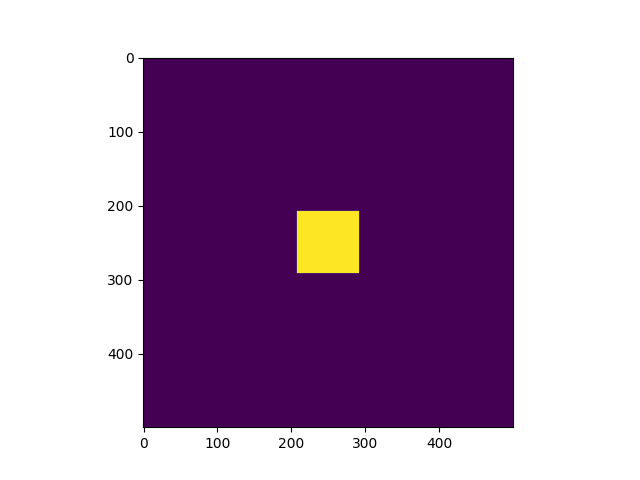

<IPython.core.display.Javascript object>


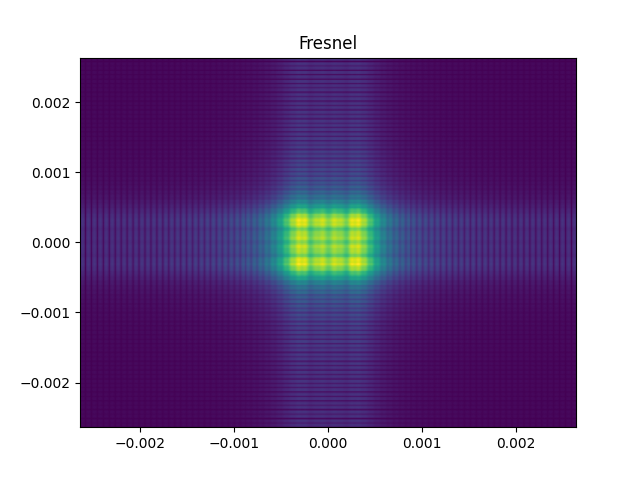

<IPython.core.display.Javascript object>


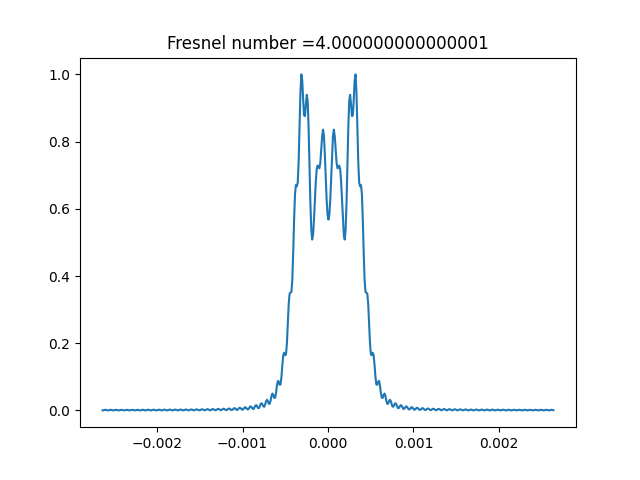

250


Text(0.5, 1.0, 'Fresnel number =4.000000000000001')

In [11]:
##### Testing Fresnel approximation for rectangular aperture, using the Fresnel number 
###Compare each plot with analytical solution plots of Goodman Figure 4-15
lda= 633e-9
pixsize = 12e-6
zdist = .1
nf  = 4
rd = np.sqrt(nf*lda*zdist)
npix = 500

##calculate the resolution the mask 
res = lda*zdist/ (pixsize*npix)
print(res)

#size of the screen 
xsiz = res * npix
ysiz = res * npix

#partial of radius define to whole side 
part = 2*rd/(pixsize * npix)

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")

    
rect = propopt.gen.rect_mask(npix, xsiz, ysiz, part, filename = None)
rmask = 1- rect

fig = plt.figure()
plt.imshow(rmask)


###calculate propagation using the Fresnel approximation 
itensity3 = propopt.prop.fresnel(zdist, rmask, npix, res, npix, xsiz, ysiz, lda)**2

#Plot the 2D diff pattern 
fig=plt.figure()
xs0 = np.linspace(-xsiz/2, xsiz/2, npix)
ys0 = np.linspace(-ysiz/2, ysiz/2, npix)
(xss, yss) = np.meshgrid(xs0, ys0)
plt.pcolormesh(xss,yss,10*itensity3**0.3)
plt.title("Fresnel")


#Plot the a cut line to the 2D diff pattern 
fig=plt.figure()
sizex,sizey = np.shape(itensity3)
xar = np.arange(0,npix)
midp = int(np.round(sizey/2))
print(midp)
yar = itensity3[midp, :]
plt.plot(xss[0],yar/np.max(yar))

plt.title("Fresnel number =" +str(fresnum))


19.747235387045812
4e-06
Fraunhoufer criterion failed because zdist < zfraun = 0.02<0.7898894154818324
The Fresnel number is larger than 1 (NF= 19.747235387045812 ): The Fresnel approx is appropriate.


<IPython.core.display.Javascript object>


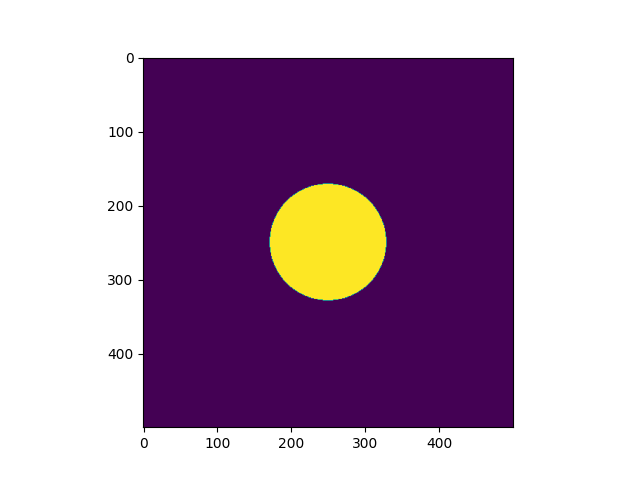

<IPython.core.display.Javascript object>


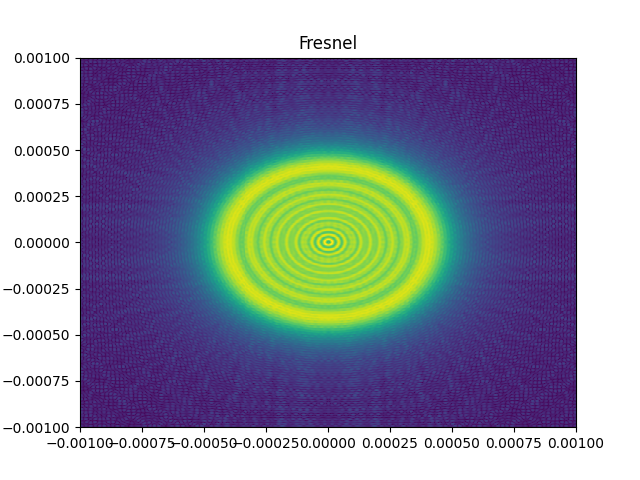

<IPython.core.display.Javascript object>


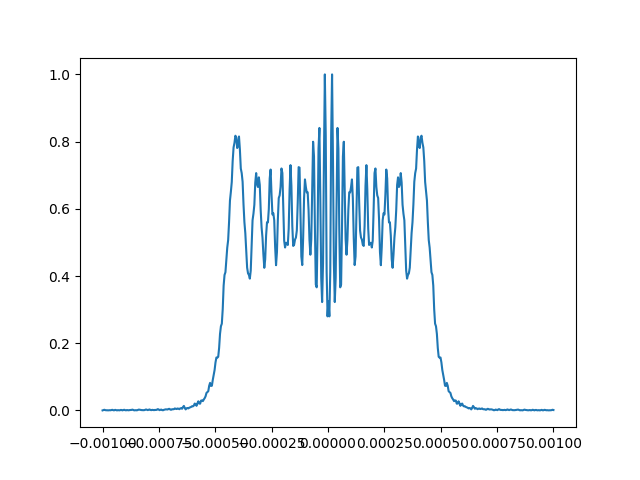

250


In [12]:
###Another example of Fresnel propagation for circular aperture 

npix = 500
zdist = 0.02 #m
lda = 633e-9 #m
rd = 0.5e-3 #m 

#use the integral as 
pixsize = 10 * lda
#pixsize = 2*rd/npix
#pixsize = 5e-6  ###This is the pix size at the detector 


partial = rd/(pixsize * npix)
#fresnel number 
nf = rd**2/(lda*zdist)
print(nf)

##calculate the resolution the mask 
res = lda*zdist/ (pixsize*npix)
print(res)

#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")


#size of the screen 
xsiz = res * npix
ysiz = res * npix

circ = propopt.gen.circ_mask(npix, xsiz, ysiz, partial, filename = None)
cmask = 1- circ

fig = plt.figure()
plt.imshow(cmask)

#Calculate propagation using Fresnel approximation 
itensity3 = propopt.prop.fresnel(zdist, cmask, npix, res, npix, xsiz, ysiz, lda)**2

#Plot the 2D diff pattern 
fig=plt.figure()
xs0 = np.linspace(-xsiz/2, xsiz/2, npix)
ys0 = np.linspace(-ysiz/2, ysiz/2, npix)
(xss, yss) = np.meshgrid(xs0, ys0)
plt.pcolormesh(xss,yss,10*itensity3**0.3)
plt.title("Fresnel")

#Plot a cut line of the 2D diff pattern 
fig=plt.figure()
sizex,sizey = np.shape(itensity3)
xar = np.arange(0,npix)
midp = int(np.round(sizey/2))
print(midp)
yar = itensity3[midp, :]
plt.plot(xss[0],yar/np.max(yar))


# Example where both Fresnel and Fraunhofer approximations give a similar result 

8.923872180451128e-06
0.010531858873091101
Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: 1.8>0.0315955766192733
The Fresnel number is smaller or equal to 1 (NF= 0.00877654906090925 ): The Fresnel approx may not be appropriate.


<IPython.core.display.Javascript object>


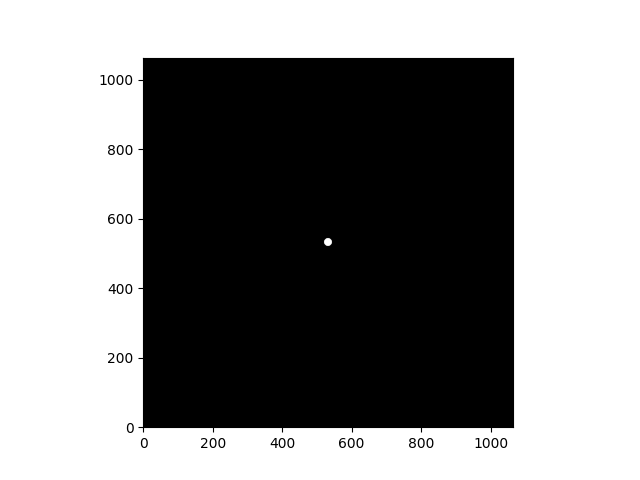

<IPython.core.display.Javascript object>


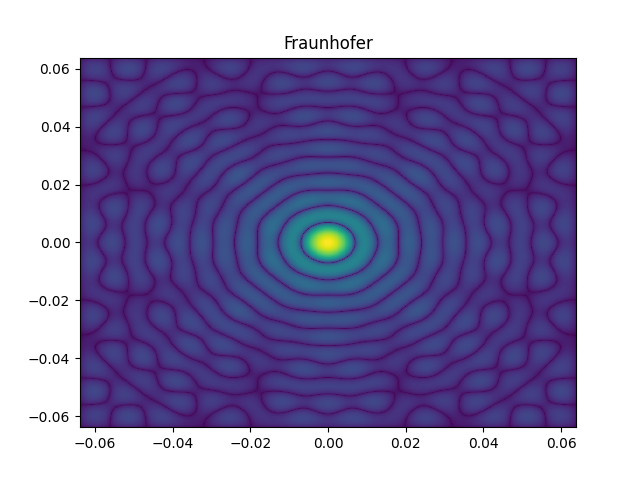

<IPython.core.display.Javascript object>


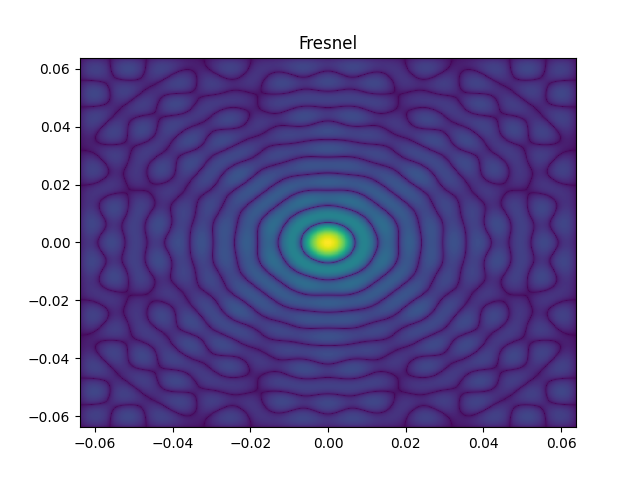

Text(0.5, 1.0, 'Fresnel')

In [13]:
lda = 633e-9
pixsize = 120e-6
rd = 100e-6
zdist = 1.8
npix = 1064

##calculate the resolution 
res = lda*zdist/ (pixsize*npix)
print(res)
xsiz = npix
ysiz = npix

part = rd/(npix*res)
print(part)


#We test the Fraunhofer criterion and Fresnel number
zfraun = propopt.prop.Fraunhofer_criterion(rd, lda)
fresnum = propopt.prop.Fresnel_num(rd, lda, zdist)

if zdist > zfraun: 
    print("Fraunhoufer criterion passed, Fraunhofer approximation is appropriate, zdist > zfraun: "+str(zdist)+">"+str(zfraun))
else: 
    print("Fraunhoufer criterion failed because zdist < zfraun = "+str(zdist)+"<"+str(zfraun))
if fresnum > 1: 
    print("The Fresnel number is larger than 1 (NF= "+str(fresnum)+" ): The Fresnel approx is appropriate.")
else: 
    print("The Fresnel number is smaller or equal to 1 (NF= "+str(fresnum)+" ): The Fresnel approx may not be appropriate.")


circ = propopt.gen.circ_mask(npix, xsiz, ysiz, partial =part, filename = None, plotting=True)
cmask = 1 - circ

xpm = npix*res
ypm = npix*res


xminus = -npix*pixsize/2
xplus = npix*pixsize/2

##Calculate the propagation from Fraunhofer approximation 
itensity3 = propopt.prop.fraunhofer(zdist, cmask, npix, pixsize, npix, xplus, xplus, lda)**2

##Plot the 2D diff pattern
fig=plt.figure()
xs1 = np.linspace(-xplus, xplus, npix)
ys1 = np.linspace(-xplus, xplus, npix)
(xs, ys) = np.meshgrid(xs1, ys1)
plt.pcolormesh(xs,ys,10*np.abs(itensity3)**0.2)
plt.title("Fraunhofer")

###########################################################

##Calculate the propagation from Fraunhofer approximation
itensity3 = propopt.prop.fresnel(zdist, cmask, npix, pixsize, npix, xplus, xplus, lda)**2

#Plot the 2D diff pattern 
fig=plt.figure()
xs1 = np.linspace(-xplus, xplus, npix)
ys1 = np.linspace(-xplus, xplus, npix)
(xs, ys) = np.meshgrid(xs1, ys1)
plt.pcolormesh(xs,ys,10*np.abs(itensity3)**0.2)
plt.title("Fresnel")
